In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [7]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())
    plt.xticks(rotation=45)
    plt.show()
    return 1

In [8]:
#List
Liste = ["ATGE US", "PRDO US", "CHGG US", "TWOU US", "LRN US", "GHC US"]

In [9]:
df = GetRet(Liste, "20200101")


Sharpe -3.510934621517221


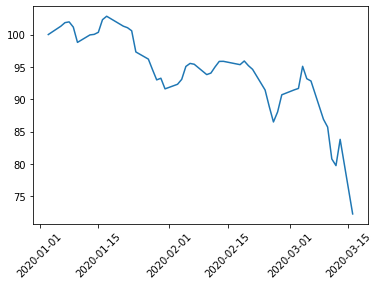

1

In [10]:
Plot(df)
